In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Loading Data

In [2]:
path = '../image64/'

In [4]:
X_train = np.load(path + 'X_train.npy')
y_train = np.load(path + 'y_train.npy')

X_validate = np.load(path + 'X_validate.npy')
y_validate = np.load(path + 'y_validate.npy')

X_test = np.load(path + 'X_test.npy')
y_test = np.load(path + 'y_test.npy')

## Reshaping

In [5]:
X_train.shape

(7922, 64, 64, 1)

In [9]:
X_train = np.reshape(X_train, (7922, 64*64*1))

In [11]:
X_validate.shape

(2264, 64, 64, 1)

In [12]:
X_validate = np.reshape(X_validate, (2264, 64*64*1))

In [13]:
X_test.shape

(1132, 64, 64, 1)

In [14]:
X_test = np.reshape(X_test, (1132, 64*64*1))

## rescale all pixel by (1./255)

In [15]:
X_train = X_train * (1./255)
X_validate = X_validate * (1./255)
X_test = X_test * (1./255)

## Feature Selection

In [18]:
from sklearn.feature_selection import SelectKBest, f_classif

In [29]:
skb = SelectKBest(f_classif)
skb.fit(X_train, y_train)
pixel_number = list(range(64*64))

df_skb = pd.DataFrame({'pixel_number': pixel_number,
                      'score': skb.scores_.tolist()}).sort_values('score', ascending = False)

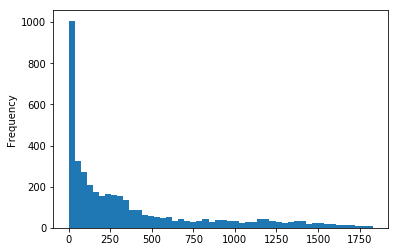

In [30]:
df_skb.score.plot(kind = 'hist', bins = 50)

In [31]:
df_skb.head()

,pixel_number,score
1336,1336,1830.027733
1158,1158,1814.436081
1094,1094,1813.303381
1273,1273,1810.632012
1400,1400,1807.782228


In [33]:
pixel_wanted = df_skb[df_skb.score >= 500]['pixel_number'].values.tolist()

## logistic regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [43]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
print('train score', lr.score(X_train, y_train))
print('validation score', lr.score(X_validate, y_validate))
print('test score', lr.score(X_test, y_test))

train score 0.9075990911386014
validation score 0.8224381625441696
test score 0.8277385159010601


In [44]:
lr = LogisticRegression()
lr.fit(X_train[:, pixel_wanted], y_train)
print('train score', lr.score(X_train[:, pixel_wanted], y_train))
print('validation score', lr.score(X_validate[:, pixel_wanted], y_validate))
print('test score', lr.score(X_test[:, pixel_wanted], y_test))

train score 0.8574854834637717
validation score 0.8277385159010601
test score 0.8303886925795053


### Logistic Regression GridSearch

### SGD logistic regression

In [45]:
from sklearn.linear_model import SGDClassifier

In [46]:
SGD = SGDClassifier()
SGD.fit(X_train,y_train)
print('train score', SGD.score(X_train, y_train))
print('validation score', SGD.score(X_validate, y_validate))
print('test score', SGD.score(X_test, y_test))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


train score 0.8268114112597829
validation score 0.8153710247349824
test score 0.8171378091872792


In [48]:
SGD = SGDClassifier()
SGD.fit(X_train[:, pixel_wanted],y_train)
print('train score', SGD.score(X_train[:, pixel_wanted], y_train))
print('validation score', SGD.score(X_validate[:, pixel_wanted], y_validate))
print('test score', SGD.score(X_test[:, pixel_wanted], y_test))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


train score 0.7765715728351427
validation score 0.7654593639575972
test score 0.7685512367491166
